In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


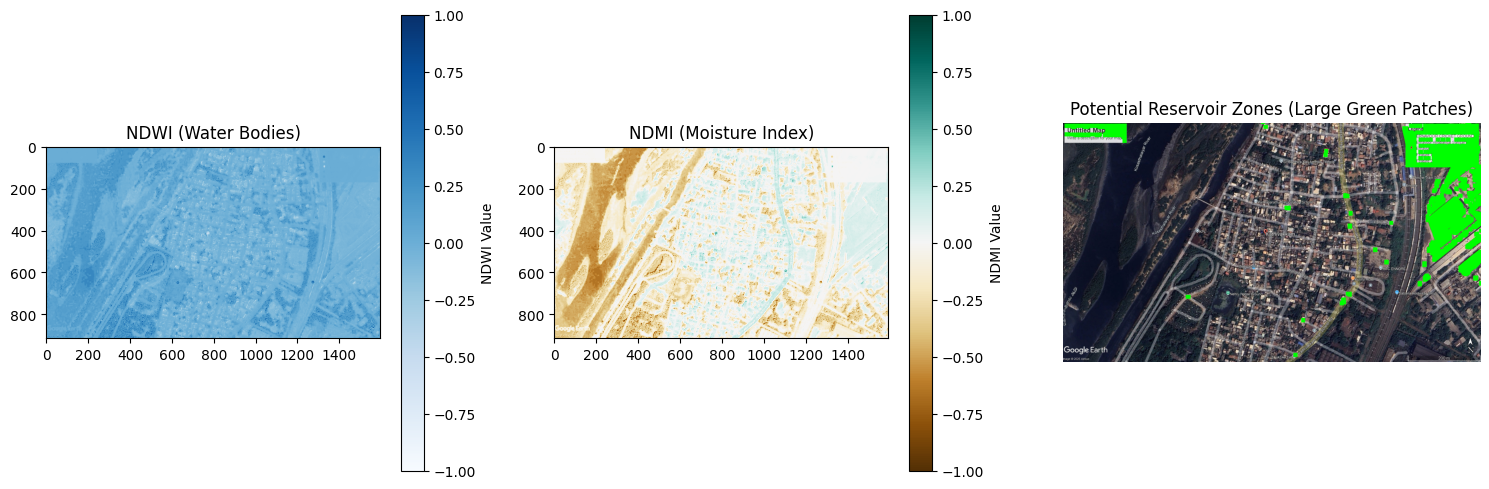

NDWI, NDMI, and Large Green Patch analysis completed successfully!
NDWI saved to: ./output/Kathivakkam\NDWI.png
NDMI saved to: ./output/Kathivakkam\NDMI.png
Potential Reservoir Zones saved to: ./output/Kathivakkam\Potential_Reservoir_Zones.png


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the uploaded satellite image
image_path = "./Locations/Kathivakkam.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
output_dir = "./output/Kathivakkam"
os.makedirs(output_dir, exist_ok=True)

ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 3, 2)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 3, 3)
plt.title("Potential Reservoir Zones (Large Green Patches)")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Reservoir_Analysis.png"))
plt.show()

# Print Summary
print("NDWI, NDMI, and Large Green Patch analysis completed successfully!")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


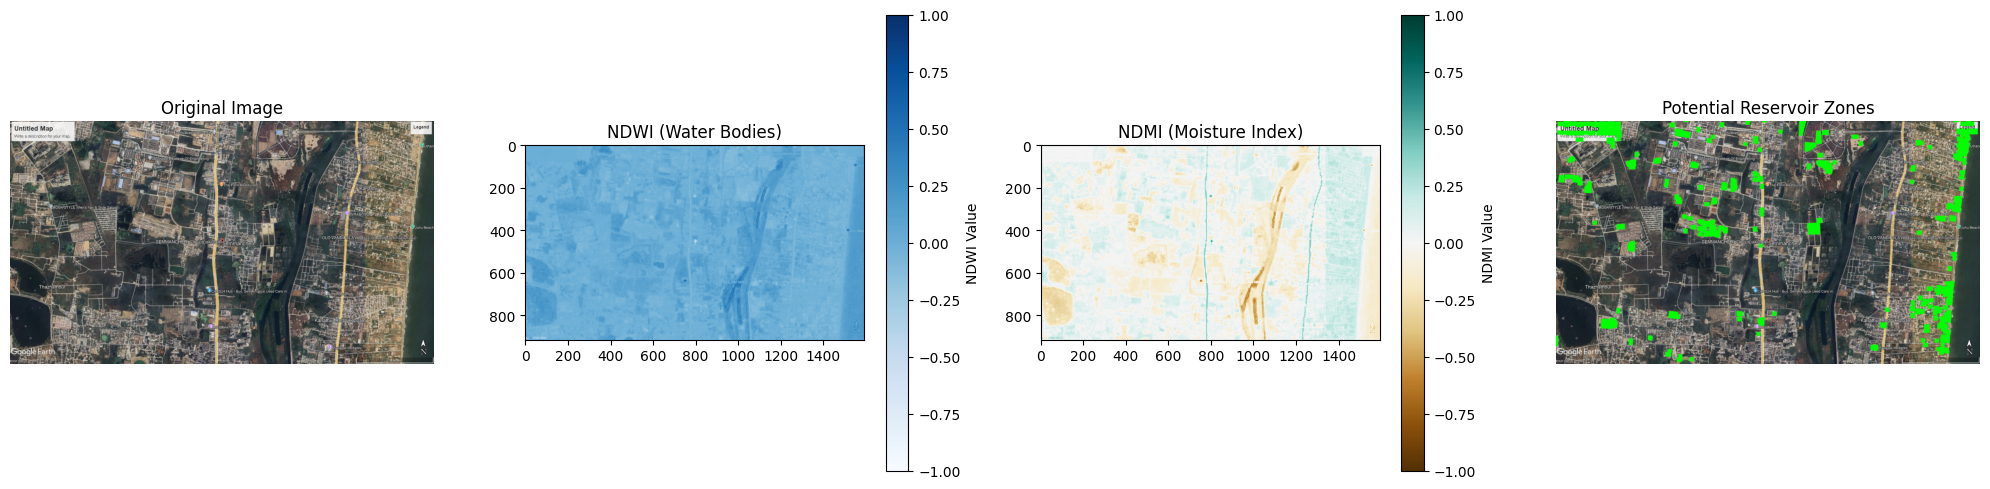

Analysis completed successfully!
Original Image saved to: ./output/Semmenchery/Original_Image.png
NDWI saved to: ./output/Semmenchery\NDWI.png
NDMI saved to: ./output/Semmenchery\NDMI.png
Potential Reservoir Zones saved to: ./output/Semmenchery\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/Semmenchery\Comparison_Analysis.png


In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "Semmenchery"

# Paths
input_image_path = f"./Locations/{location_name}.jpg"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


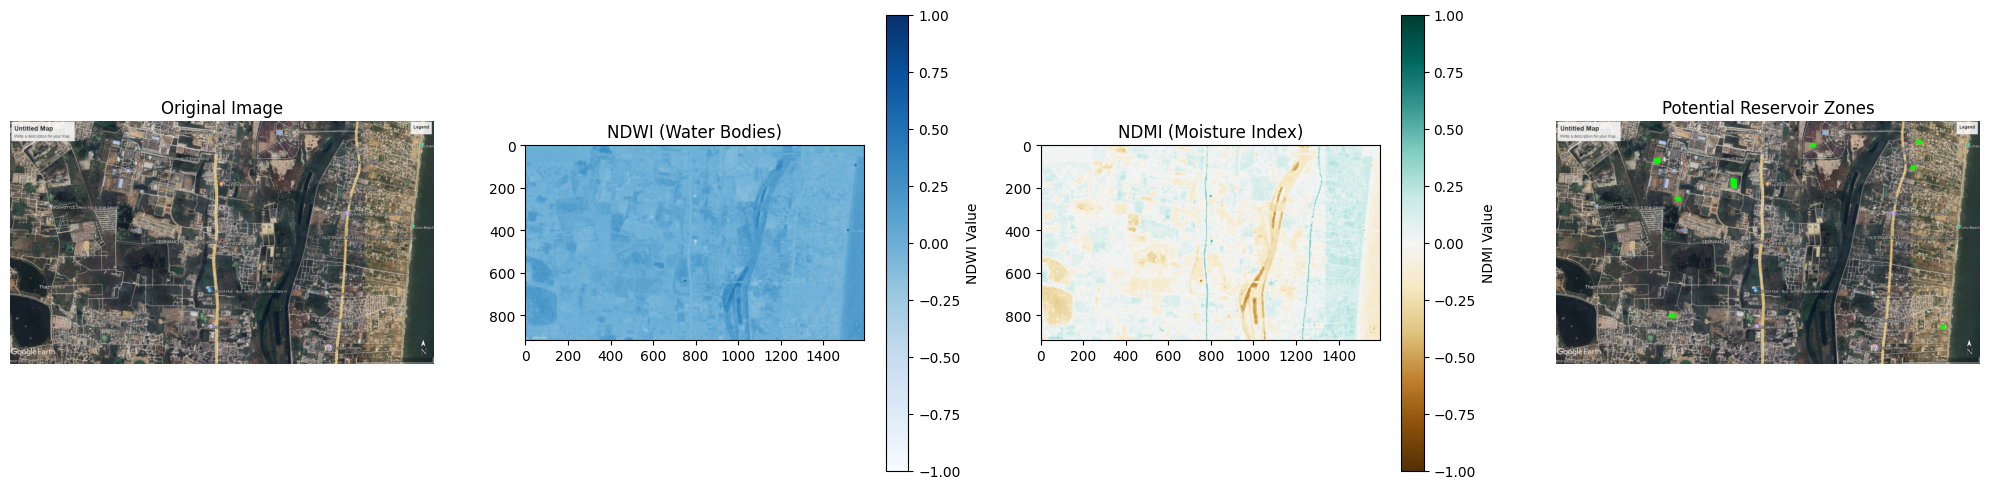

Analysis completed successfully!
Original Image saved to: ./output/Semmenchery/Original_Image.png
NDWI saved to: ./output/Semmenchery\NDWI.png
NDMI saved to: ./output/Semmenchery\NDMI.png
Potential Reservoir Zones saved to: ./output/Semmenchery\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/Semmenchery\Comparison_Analysis.png


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "Semmenchery"

# Paths
input_image_path = f"./Locations/{location_name}.jpg"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.4)  # Threshold for identifying green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Beaches tend to have high NDWI values
urban_mask = ndmi < -0.1  # Urban areas tend to have low NDMI values

green_mask = green_mask & (~beach_mask) & (~urban_mask)  # Exclude beaches and urban areas

# Remove small patches using morphological operations
kernel = np.ones((15, 15), np.uint8)  # Adjust kernel size based on image resolution
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


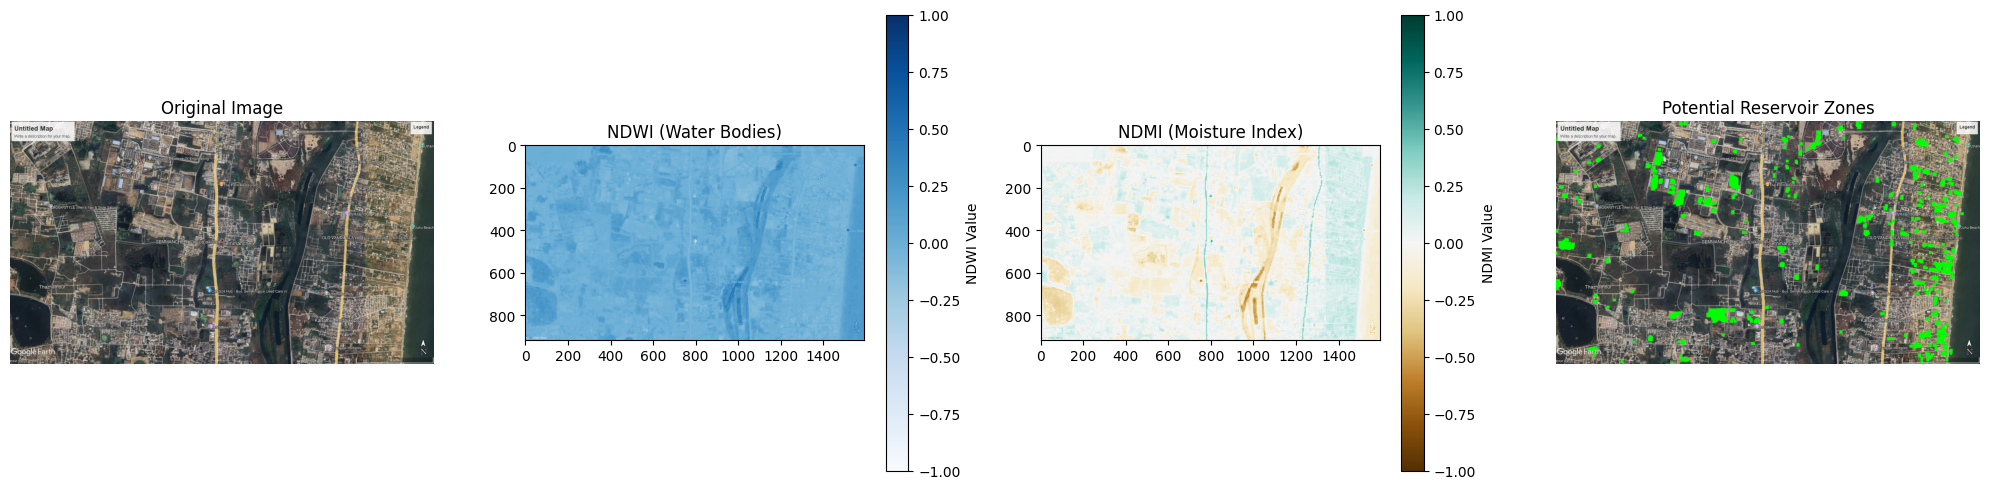

Analysis completed successfully!
Original Image saved to: ./output/Semmenchery/Original_Image.png
NDWI saved to: ./output/Semmenchery\NDWI.png
NDMI saved to: ./output/Semmenchery\NDMI.png
Potential Reservoir Zones saved to: ./output/Semmenchery\Potential_Reservoir_Zones.png
Comparison Analysis saved to: ./output/Semmenchery\Comparison_Analysis.png


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define location name
location_name = "Semmenchery"

# Paths
input_image_path = f"./Locations/{location_name}.jpg"
output_dir = f"./output/{location_name}"
os.makedirs(output_dir, exist_ok=True)

# Load the uploaded satellite image
image = cv2.imread(input_image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {input_image_path}")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
cv2.imwrite(os.path.join(output_dir, "Original_Image.png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

# Normalize image
image = image.astype(np.float32) / 255.0

# Extract RGB channels (assuming single image contains necessary information)
nir_band = image[:, :, 0]  # Using Red as a substitute for NIR
green_band = image[:, :, 1]  # Green band
swir_band = image[:, :, 2]  # Blue as a substitute for SWIR

# Compute NDWI (Normalized Difference Water Index)
def compute_ndwi(nir, green):
    return (green - nir) / (green + nir + 1e-10)

# Compute NDMI (Normalized Difference Moisture Index)
def compute_ndmi(nir, swir):
    return (nir - swir) / (nir + swir + 1e-10)

ndwi = compute_ndwi(nir_band, green_band)
ndmi = compute_ndmi(nir_band, swir_band)

# Identify large green patches as potential reservoir zones
green_mask = (green_band > 0.3)  # Relaxed threshold to capture more green areas

# Exclude beach areas (high NDWI) and urban areas (low NDMI)
beach_mask = (ndwi > 0.3) | (swir_band > 0.5)  # Adjusted thresholds to refine exclusion
urban_mask = ndmi < -0.1  # More refined urban mask to differentiate uninhabited green areas

# Include uninhabited green fields by relaxing urban mask constraints
green_mask = green_mask & (~beach_mask) & (~urban_mask)

# Remove small patches using morphological operations
kernel = np.ones((10, 10), np.uint8)  # Reduced kernel size to preserve smaller patches
large_green_patches = cv2.morphologyEx(green_mask.astype(np.uint8), cv2.MORPH_OPEN, kernel)

# Overlay large green patches on the original image
highlighted_image = image.copy()
highlighted_image[large_green_patches == 1] = [0, 255, 0]  # Green color for large potential reservoirs

# Save processed images
ndwi_output = os.path.join(output_dir, "NDWI.png")
ndmi_output = os.path.join(output_dir, "NDMI.png")
reservoir_output = os.path.join(output_dir, "Potential_Reservoir_Zones.png")
comparison_output = os.path.join(output_dir, "Comparison_Analysis.png")

# Convert NDWI/NDMI to 8-bit format for saving
def save_image(output_path, data, colormap=cv2.COLORMAP_JET):
    norm_data = ((data + 1) / 2 * 255).astype(np.uint8)  # Normalize to [0,255]
    color_mapped = cv2.applyColorMap(norm_data, colormap)  # Apply color mapping
    cv2.imwrite(output_path, color_mapped)

save_image(ndwi_output, ndwi, colormap=cv2.COLORMAP_OCEAN)  # NDWI with blue colors
save_image(ndmi_output, ndmi, colormap=cv2.COLORMAP_BONE)   # NDMI with brown colors
cv2.imwrite(reservoir_output, cv2.cvtColor(highlighted_image * 255, cv2.COLOR_RGB2BGR))

# Display and Save Comparison Analysis
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("NDWI (Water Bodies)")
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI Value")

plt.subplot(1, 4, 3)
plt.title("NDMI (Moisture Index)")
plt.imshow(ndmi, cmap="BrBG", vmin=-1, vmax=1)
plt.colorbar(label="NDMI Value")

plt.subplot(1, 4, 4)
plt.title("Potential Reservoir Zones")
plt.imshow(highlighted_image)
plt.axis("off")

plt.tight_layout()
plt.savefig(comparison_output)
plt.show()

# Print Summary
print("Analysis completed successfully!")
print(f"Original Image saved to: {output_dir}/Original_Image.png")
print(f"NDWI saved to: {ndwi_output}")
print(f"NDMI saved to: {ndmi_output}")
print(f"Potential Reservoir Zones saved to: {reservoir_output}")
print(f"Comparison Analysis saved to: {comparison_output}")